# Popularity Plot

Author: Patrik Goldschmidt (igoldschmidt@fit.vut.cz)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

In [2]:
pop = pd.DataFrame(data=[
    #['Custom', 23, 17],
    ['CIC-IDS2017', 13, 2],
    ['CTU-13', 7, 0],
    ['Kitsune', 7, 0],
    ['UNSW-NB15', 7, 1],
    ['CSE-CIC-IDS2018', 5, 0],
    ['CIC-DDoS2019', 3, 0],
    ['NSL-KDD', 3, 0],
    ['BoT-IoT', 2, 0],
    ['CAIDA DDoS 2007', 2, 0],
    ['MAWILab', 2, 0],
    ['Custom', 23, 17],
    ['Other (unlisted)', 18, 0],
    ['Other (listed)', 14, 0],
], columns=['dataset', 'total', 'special'])

pop

,dataset,total,special
0,CIC-IDS2017,13,2
1,CTU-13,7,0
2,Kitsune,7,0
3,UNSW-NB15,7,1
4,CSE-CIC-IDS2018,5,0
5,CIC-DDoS2019,3,0
6,NSL-KDD,3,0
7,BoT-IoT,2,0
8,CAIDA DDoS 2007,2,0
9,MAWILab,2,0


In [3]:
# Compute other columns for a stacked barplot
pop['non_special'] = pop['total'] - pop['special']
pop['private'] = 0
pop.loc[pop['dataset'] == 'Custom', 'private'] = pop[pop['dataset'] == 'Custom']['special']
pop['variant'] = 0
pop.loc[pop['dataset'] != 'Custom', 'variant'] = pop[pop['dataset'] != 'Custom']['special']

pop

,dataset,total,special,non_special,private,variant
0,CIC-IDS2017,13,2,11,0,2
1,CTU-13,7,0,7,0,0
2,Kitsune,7,0,7,0,0
3,UNSW-NB15,7,1,6,0,1
4,CSE-CIC-IDS2018,5,0,5,0,0
5,CIC-DDoS2019,3,0,3,0,0
6,NSL-KDD,3,0,3,0,0
7,BoT-IoT,2,0,2,0,0
8,CAIDA DDoS 2007,2,0,2,0,0
9,MAWILab,2,0,2,0,0


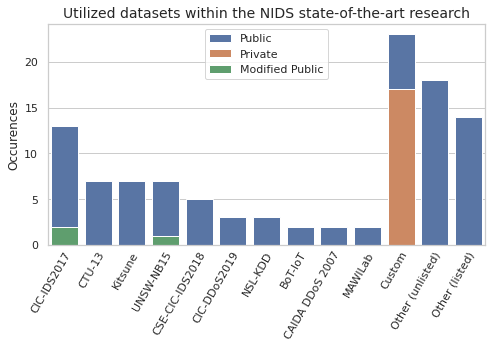

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,5))

ax = sns.barplot(data=pop, x='dataset', y='private', color=sns.color_palette()[1], label='Private')
ax = sns.barplot(data=pop, x='dataset', y='variant', color=sns.color_palette()[2], label='Modified Public')
ax = sns.barplot(data=pop, x='dataset', y='non_special', bottom=pop['special'], color=sns.color_palette()[0], label='Public')
plt.xlabel('')
plt.ylabel('Occurences')
plt.title("Utilized datasets within the NIDS state-of-the-art research", fontsize=14)

# Rotate tickers to make them not overallping
plt.xticks(rotation=60, horizontalalignment='right')

# Transform tickers a bit to the right (first) and up (second)
trans = mtrans.Affine2D().translate(8, 5)
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform() + trans)

# Reoder legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center')

plt.tight_layout()
plt.savefig('datapopularity.pdf')
plt.show()